In [1]:
import pandas as pd

# Carregar dados

In [6]:
df = pd.read_csv('../data/news.csv')
df

,titulo,subtitulo,data,autor,texto
0,Barroso lança livro sobre Inteligência Artific...,Presidente do STF fez sessão de autógrafos na ...,20.ago.2024 (terça-feira) - 23h28,PODER360,"O presidente doSTF(Supremo Tribunal Federal), ..."
1,Marçal apaga 4º vídeo com críticas a Boulos ap...,"Segundo o TRE de São Paulo, o conteúdo não tem...",20.ago.2024 (terça-feira) - 23h21,Autor não encontrado,O candidato à Prefeitura de São PauloPablo Mar...
2,Kamala aceita de forma simbólica nomeação do P...,Democrata diz estar “honrada” por receber indi...,20.ago.2024 (terça-feira) - 23h08,PODER360,"A vice-presidente dos Estados Unidos,Kamala Ha..."
3,Janja participa da cerimônia de Restauração do...,Primeira-dama foi convidada pelo ministro da J...,20.ago.2024 (terça-feira) - 23h01,PODER360,"A primeira-dama, Janja Lula da Silva, particip..."
4,"Trump não tem empatia moral, diz ex-secretária...",Ex-apoiadores discursam no 2º dia da Convenção...,20.ago.2024 (terça-feira) - 22h05,PODER360,A ex-secretária de imprensa da Casa Branca do ...
...,...,...,...,...,...
1503,Entenda o que é importante considerar ao escol...,Rede D’Or investe em qualidade e obtém resulta...,2.set.2024 (segunda-feira) - 6h00,Rede D'Or,A escolha de um hospital para tratar questões ...
1504,Brasil tem agosto com maior número de queimada...,"Segundo o Inpe, mês concentrou 54% do total da...",2.set.2024 (segunda-feira) - 6h00,Katarina Moraes redatora,O Brasil registrou 68.635 queimadas em agosto ...
1505,Candidatos com maior caixa em capitais não con...,"Ricardo Nunes, Alexandre Ramagem e Bruno Engle...",2.set.2024 (segunda-feira) - 5h58,Naomi Matsui repórter,Os candidatos a prefeituras nasmaiores capitai...
1506,Rússia volta a atacar Kiev com mísseis e drones,Pelo menos 3 pessoas ficam feridas por destroç...,2.set.2024 (segunda-feira) - 4h55,PODER360,A Rússia voltou a atacar Kiev na manhã desta 2...


# Geração dos Embeddings

referência : [huggingface](https://huggingface.co/distilbert/distilgpt2)

In [104]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained('distilgpt2')
model = AutoModel.from_pretrained('distilgpt2')

tokenizer.pad_token = tokenizer.eos_token

def get_embedding(text):
    text = str(text)
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings


# Gerar embeddings para cada texto no DataFrame

In [13]:
df['texto'] = df['texto'].astype(str)
df['embedding'] = df['texto'].apply(get_embedding)

In [ ]:
# df.to_csv('../data/news_embeddings.csv', index=False)

In [181]:
# Ler o novo dataset
df_embeddings = pd.read_csv('../data/news_embeddings.csv')
df_embeddings


,titulo,subtitulo,data,autor,texto,embedding
0,Barroso lança livro sobre Inteligência Artific...,Presidente do STF fez sessão de autógrafos na ...,20.ago.2024 (terça-feira) - 23h28,PODER360,"O presidente doSTF(Supremo Tribunal Federal), ...","tensor([[ 4.0755e-01, -5.1400e-01, 6.6721e-03..."
1,Marçal apaga 4º vídeo com críticas a Boulos ap...,"Segundo o TRE de São Paulo, o conteúdo não tem...",20.ago.2024 (terça-feira) - 23h21,Autor não encontrado,O candidato à Prefeitura de São PauloPablo Mar...,"tensor([[ 4.0675e-01, -5.8195e-01, 7.5433e-02..."
2,Kamala aceita de forma simbólica nomeação do P...,Democrata diz estar “honrada” por receber indi...,20.ago.2024 (terça-feira) - 23h08,PODER360,"A vice-presidente dos Estados Unidos,Kamala Ha...","tensor([[ 4.5613e-01, -5.9786e-01, -1.1529e-01..."
3,Janja participa da cerimônia de Restauração do...,Primeira-dama foi convidada pelo ministro da J...,20.ago.2024 (terça-feira) - 23h01,PODER360,"A primeira-dama, Janja Lula da Silva, particip...","tensor([[ 4.8999e-01, -4.3811e-01, -8.9346e-02..."
4,"Trump não tem empatia moral, diz ex-secretária...",Ex-apoiadores discursam no 2º dia da Convenção...,20.ago.2024 (terça-feira) - 22h05,PODER360,A ex-secretária de imprensa da Casa Branca do ...,"tensor([[ 4.4242e-01, -4.7903e-01, 6.0203e-02..."
...,...,...,...,...,...,...
1503,Entenda o que é importante considerar ao escol...,Rede D’Or investe em qualidade e obtém resulta...,2.set.2024 (segunda-feira) - 6h00,Rede D'Or,A escolha de um hospital para tratar questões ...,"tensor([[ 3.0516e-01, -5.3281e-01, -1.5142e-01..."
1504,Brasil tem agosto com maior número de queimada...,"Segundo o Inpe, mês concentrou 54% do total da...",2.set.2024 (segunda-feira) - 6h00,Katarina Moraes redatora,O Brasil registrou 68.635 queimadas em agosto ...,"tensor([[ 4.0000e-01, -5.5470e-01, -1.8626e-01..."
1505,Candidatos com maior caixa em capitais não con...,"Ricardo Nunes, Alexandre Ramagem e Bruno Engle...",2.set.2024 (segunda-feira) - 5h58,Naomi Matsui repórter,Os candidatos a prefeituras nasmaiores capitai...,"tensor([[ 3.1770e-01, -4.9443e-01, -4.2862e-02..."
1506,Rússia volta a atacar Kiev com mísseis e drones,Pelo menos 3 pessoas ficam feridas por destroç...,2.set.2024 (segunda-feira) - 4h55,PODER360,A Rússia voltou a atacar Kiev na manhã desta 2...,"tensor([[ 3.0040e-01, -4.7936e-01, -9.3302e-02..."


# Redução de Dimensão com Autoencoder

In [209]:
import torch.nn as nn
import torch.optim as optim


class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim // 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim // 2, hidden_dim),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim),
            nn.Linear(hidden_dim, input_dim),
            nn.Tanh()  # Use nn.Sigmoid() if your data is [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
class CosineSimilarityLoss(nn.Module):
    def __init__(self):
        super(CosineSimilarityLoss, self).__init__()
        self.cosine_similarity = nn.CosineSimilarity(dim=1)
    
    def forward(self, output, target):
        similarity = self.cosine_similarity(output, target)
        loss = 1 - similarity.mean()
        return loss

In [184]:
import torch
import re
import numpy as np

def convert_string_to_tensor(tensor_string):
    cleaned_string = re.sub(r'tensor\(\s*|\s*\)', '', tensor_string)
    cleaned_string = cleaned_string.replace('\n', '').replace(' ', '').replace('[[', '').replace(']]', '')
    tensor_data = np.array(eval('[' + cleaned_string + ']')) 
    return torch.tensor(tensor_data)


df_embeddings['embedding'] = df_embeddings['embedding'].apply(convert_string_to_tensor)



Embeddings shape: torch.Size([1508, 768])


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:03<00:00, 27.08it/s]


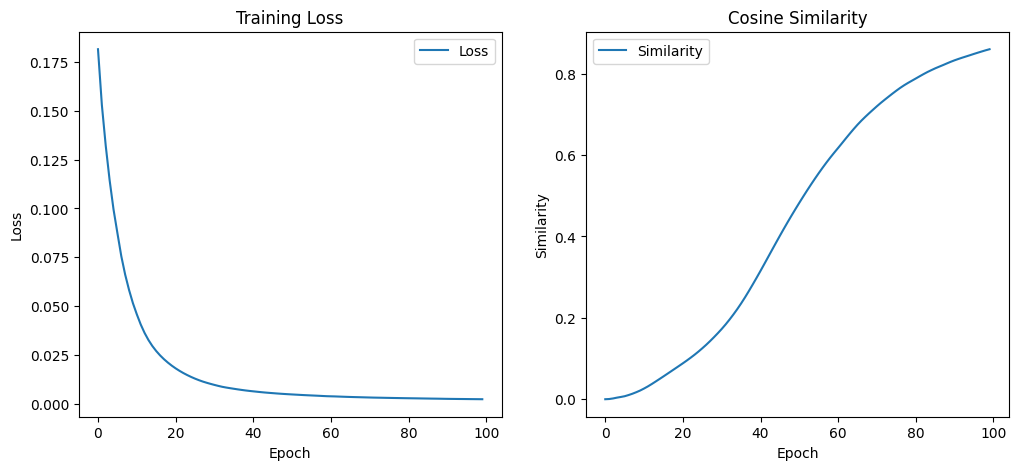

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt


df = df_embeddings
input_dim = df['embedding'][0].shape[0] 
hidden_dim = 128
autoencoder = Autoencoder(input_dim, hidden_dim)

optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)  # Consider increasing the learning rate
loss_fn = nn.MSELoss()

# Normalize embeddings
embeddings = torch.stack([embedding.clone().detach() for embedding in df['embedding'].values])
embeddings = embeddings.squeeze(1).to(torch.float32)
print(f'Embeddings shape: {embeddings.shape}')
embeddings = F.normalize(embeddings, p=2, dim=1)

num_epochs = 100  # Consider increasing epochs
losses = []
similarities = []

for epoch in tqdm(range(num_epochs)):
    autoencoder.train() 
    optimizer.zero_grad()
    outputs = autoencoder(embeddings)
    loss = loss_fn(outputs, embeddings)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(autoencoder.parameters(), max_norm=1.0)
    optimizer.step()

    similarity = F.cosine_similarity(outputs, embeddings).mean().item()
    similarities.append(similarity)
    losses.append(loss.item())



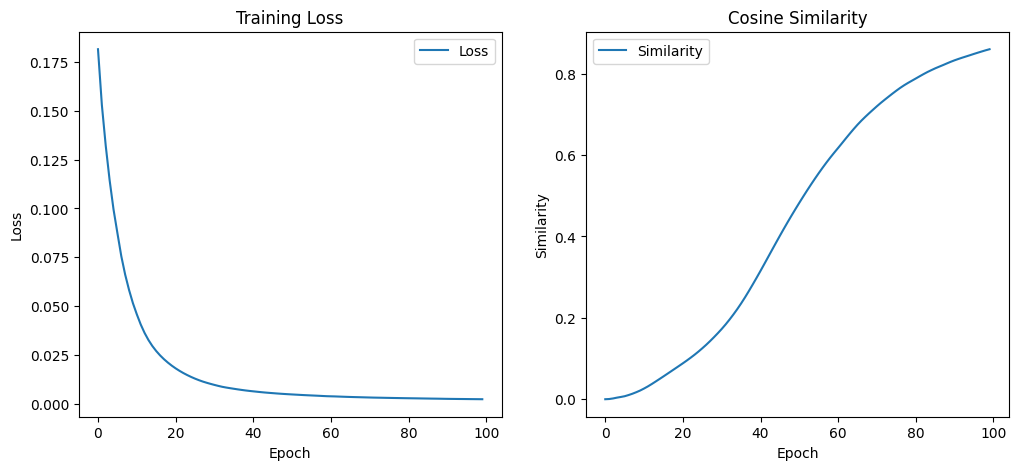

In [210]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(similarities, label='Similarity')
plt.title('Cosine Similarity')
plt.xlabel('Epoch')
plt.ylabel('Similarity')
plt.legend()

plt.show()

# Visualização dos embeddings
### T-SNE

In [211]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.manifold import TSNE
import pandas as pd


embeddings_ajustadas = outputs.detach().cpu() 
embeddings_pre_treinadas = embeddings.cpu() 

embeddings_ajustadas_np = embeddings_ajustadas.numpy()
embeddings_pre_treinadas_np = embeddings_pre_treinadas.numpy()

embeddings_combined = np.concatenate([embeddings_ajustadas_np, embeddings_pre_treinadas_np], axis=0)
labels = ['Ajustadas'] * len(embeddings_ajustadas_np) + ['Pré-treinadas'] * len(embeddings_pre_treinadas_np)

tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings_combined)



## Plotagem dos embeddings em 2D usando T-SNE

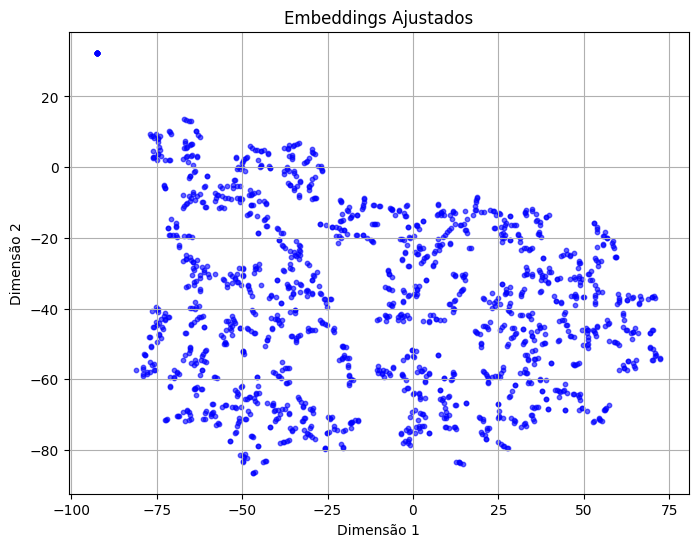

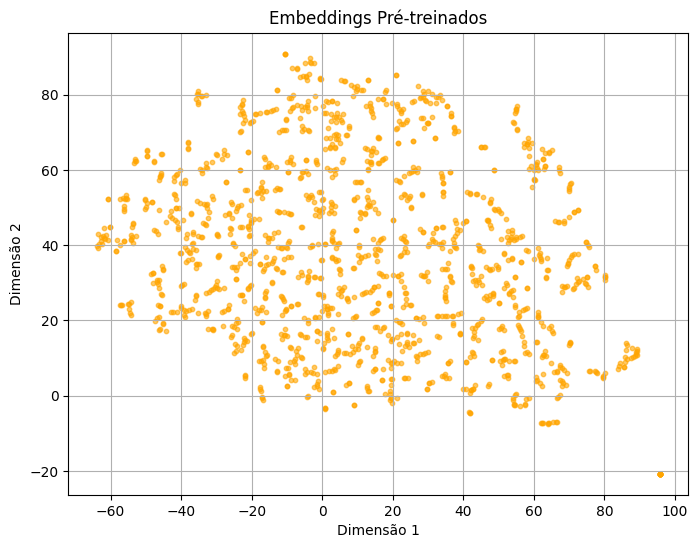

In [212]:
embeddings_ajustadas_2d = embeddings_2d[:len(embeddings_ajustadas_np)]
embeddings_pre_treinadas_2d = embeddings_2d[len(embeddings_ajustadas_np):]

# Figura para os embeddings ajustados
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(embeddings_ajustadas_2d[:, 0], embeddings_ajustadas_2d[:, 1], color='blue', s=10, alpha=0.6)
plt.title("Embeddings Ajustados")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.grid(True)
plt.show()

# Figura para os embeddings pré-treinados
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(embeddings_pre_treinadas_2d[:, 0], embeddings_pre_treinadas_2d[:, 1], color='orange', s=10, alpha=0.6)
plt.title("Embeddings Pré-treinados")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.grid(True)
plt.show()


# Adicionar os embeddings reduzidos ao DataFrame

In [213]:
# Salvar os embeddings ajustados
df['embedding_ajustada'] = [embedding for embedding in embeddings_ajustadas]
df.to_csv('../data/news_embeddings_ajustados.csv', index=False)

In [214]:
# Ler o novo dataset
df = pd.read_csv('../data/news_embeddings_ajustados.csv')
df


,titulo,subtitulo,data,autor,texto,embedding,embedding_ajustada
0,Barroso lança livro sobre Inteligência Artific...,Presidente do STF fez sessão de autógrafos na ...,20.ago.2024 (terça-feira) - 23h28,PODER360,"O presidente doSTF(Supremo Tribunal Federal), ...","tensor([ 4.0755e-01, -5.1400e-01, 6.6721e-03,...","tensor([-1.1767e-03, -1.8372e-02, 9.5532e-03,..."
1,Marçal apaga 4º vídeo com críticas a Boulos ap...,"Segundo o TRE de São Paulo, o conteúdo não tem...",20.ago.2024 (terça-feira) - 23h21,Autor não encontrado,O candidato à Prefeitura de São PauloPablo Mar...,"tensor([ 4.0675e-01, -5.8195e-01, 7.5433e-02,...","tensor([-1.7060e-02, 1.3023e-02, -8.0985e-04,..."
2,Kamala aceita de forma simbólica nomeação do P...,Democrata diz estar “honrada” por receber indi...,20.ago.2024 (terça-feira) - 23h08,PODER360,"A vice-presidente dos Estados Unidos,Kamala Ha...","tensor([ 4.5613e-01, -5.9786e-01, -1.1529e-01,...","tensor([-7.6010e-03, -6.4380e-03, 1.2108e-02,..."
3,Janja participa da cerimônia de Restauração do...,Primeira-dama foi convidada pelo ministro da J...,20.ago.2024 (terça-feira) - 23h01,PODER360,"A primeira-dama, Janja Lula da Silva, particip...","tensor([ 4.8999e-01, -4.3811e-01, -8.9346e-02,...","tensor([ 1.0312e-02, 4.1612e-03, -3.4550e-02,..."
4,"Trump não tem empatia moral, diz ex-secretária...",Ex-apoiadores discursam no 2º dia da Convenção...,20.ago.2024 (terça-feira) - 22h05,PODER360,A ex-secretária de imprensa da Casa Branca do ...,"tensor([ 4.4242e-01, -4.7903e-01, 6.0203e-02,...","tensor([ 2.0699e-02, 2.7126e-02, 3.5699e-03,..."
...,...,...,...,...,...,...,...
1503,Entenda o que é importante considerar ao escol...,Rede D’Or investe em qualidade e obtém resulta...,2.set.2024 (segunda-feira) - 6h00,Rede D'Or,A escolha de um hospital para tratar questões ...,"tensor([ 3.0516e-01, -5.3281e-01, -1.5142e-01,...","tensor([-1.6367e-02, 1.6732e-02, -4.0293e-02,..."
1504,Brasil tem agosto com maior número de queimada...,"Segundo o Inpe, mês concentrou 54% do total da...",2.set.2024 (segunda-feira) - 6h00,Katarina Moraes redatora,O Brasil registrou 68.635 queimadas em agosto ...,"tensor([ 4.0000e-01, -5.5470e-01, -1.8626e-01,...","tensor([ 5.6809e-04, -2.5736e-02, 8.7606e-03,..."
1505,Candidatos com maior caixa em capitais não con...,"Ricardo Nunes, Alexandre Ramagem e Bruno Engle...",2.set.2024 (segunda-feira) - 5h58,Naomi Matsui repórter,Os candidatos a prefeituras nasmaiores capitai...,"tensor([ 3.1770e-01, -4.9443e-01, -4.2862e-02,...","tensor([-2.7355e-02, -1.7856e-02, -4.3131e-04,..."
1506,Rússia volta a atacar Kiev com mísseis e drones,Pelo menos 3 pessoas ficam feridas por destroç...,2.set.2024 (segunda-feira) - 4h55,PODER360,A Rússia voltou a atacar Kiev na manhã desta 2...,"tensor([ 3.0040e-01, -4.7936e-01, -9.3302e-02,...","tensor([ 3.3835e-02, -1.3731e-02, -4.3489e-03,..."


In [215]:
# Criar um dicionário com os embeddings ajustados e o texto associado {noticia: texto, embedding: tensor}
df['embedding_ajustada'] = df['embedding_ajustada'].apply(convert_string_to_tensor)

news_embeddings = df[['texto', 'embedding_ajustada']].to_dict(orient='records')



In [216]:
news_embeddings[0]['texto']

'O presidente doSTF(Supremo Tribunal Federal), Roberto Barroso, lançou nesta 3ª feira (20.ago.2024) um livro sobre Inteligência Artificial em que reúne reflexões acerca de plataformas digitais, mudanças climáticas, democracia, populismo autoritário e o aumento da desinformação e dos discursos de ódio.\nA obra “Inteligência Artificial, Plataformas Digitais e Democracia – Direito e tecnologia no mundo atual” foi lançado no Soho Brasília, no Pontão do Lago Sul da capital.\nO evento contou com a presença de diversas autoridades, dentre elas alguns ministros do Supremo como Cristiano Zanin, Alexandre de Moraes, Luiz Fux e Gilmar Mendes.\nTambém estiveram presentes as seguintes autoridades:\nBruno Dantas, presidente do TCU (Tribunal de Contas da União),\nDaniela Teixeira, ministra do STJ (Superior Tribunal de Justiça);\nJosé Múcio Monteiro, ministro da Defesa;\nRicardo Lewandowski, ministro da Justiça e Segurança Pública e ministro aposentado do STF;\nLuis Felipe Salomão, corregedor nacional

In [217]:
import faiss
import numpy as np

embeddings = df['embedding_ajustada'].tolist()  # Obtenha os embeddings como lista

embeddings_np = np.array(embeddings).astype('float32')

print(f"Forma do array de embeddings antes da alteração: {embeddings_np.shape}")

embeddings_np = np.squeeze(embeddings_np)  

print(f"Forma do array de embeddings após a alteração: {embeddings_np.shape}")

dimensão = embeddings_np.shape[1] 
index = faiss.IndexFlatL2(dimensão)  
index.add(embeddings_np) 

# Salvar o índice em um arquivo
faiss.write_index(index, "vectordb_news.faiss")


Forma do array de embeddings antes da alteração: (1508, 1, 768)
Forma do array de embeddings após a alteração: (1508, 768)


In [229]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained('distilgpt2')
model = AutoModel.from_pretrained('distilgpt2')

tokenizer.pad_token = tokenizer.eos_token

def get_embedding(text):
    text = str(text)
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).numpy().astype('float32')
    return embeddings





In [414]:
import faiss
import numpy as np

# Carregar o índice
index = faiss.read_index("../vectordb_news.faiss") 


def search(query, index, embeddings, similarity_threshold, k=40):
    query_embedding = get_embedding(query).astype('float32')
    query_embedding = np.squeeze(query_embedding)

    D, I = index.search(query_embedding.reshape(1, -1), k)

    similarity_scores = 1 / (1 + D[0]) 
    similarity_scores = (similarity_scores - similarity_scores.min()) / (similarity_scores.max() - similarity_scores.min())
    
    
    similar_texts = [
        embeddings[i] for score, i in zip(similarity_scores, I[0]) if score >= similarity_threshold
    ]
    # Remover o primeiro elemento e o último elemento da lista de similar_texts e similarity_scores
    similar_texts = similar_texts[1:-1]
    similarity_scores = similarity_scores[1:-1]

    return similar_texts, similarity_scores


query = "Bolsonaro anuncia novo projeto de exploração espacial"

similar_texts, similarity_scores = search(query, index, df['texto'].tolist(), similarity_threshold=0.6)
print(f"Número de textos similares encontrados: {len(similar_texts)}")



Número de textos similares encontrados: 10
